Build or load a 'CatchmentData' instance to allow access to all needed data

In [1]:
rebuild_catchment = True

In [2]:
from forecasting.catchment_data import CatchmentData
import pickle

if rebuild_catchment:
    catchment = CatchmentData("illinois-kerby", "14377100")

    pickle_out = open("temp_storage/catchment.pickle", "wb")
    pickle.dump(catchment, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("temp_storage/catchment.pickle", "rb")
    catchment = pickle.load(pickle_in)

data\historical\illinois-kerby
42_121908
-123_811815
data\historical\illinois-kerby
42_06732
-123_735599
data\historical\illinois-kerby
42_036081
-123_815442
data\historical\illinois-kerby
41_988114
-123_716582
data\historical\illinois-kerby
41_951352
-123_608504
data\historical\illinois-kerby
42_07535
-123_61605
data\historical\illinois-kerby
42_031164
-123_534899
data\historical\illinois-kerby
42_068429
-123_449217
data\historical\illinois-kerby
42_131317
-123_365868
data\historical\illinois-kerby
42_175018
-123_470912
data\historical\illinois-kerby
42_121267
-123_67246
data\historical\illinois-kerby
42_119886
-123_567812


Create a Forecaster instance using the catchment instance and a desired Darts model.

In [46]:
from darts.models import BlockRNNModel
from forecasting.dataset import Dataset
dataset = Dataset(catchment)
params = {
    "input_chunk_length" : [96, 120],
    "output_chunk_length" : [96],
    "hidden_size" : [25, 50],
    "n_rnn_layers" : [1, 5, 9]
}
X_train = dataset.X_trains[0]
y_train = dataset.y_train

y_train, y_val = y_train.split_before(0.8)



In [47]:
BlockRNNModel.gridsearch(params, verbose=True, series=y_train, past_covariates=X_train, val_series=y_val)

  0%|          | 0/12 [00:00<?, ?it/s]

[2022-02-22 18:29:28,264] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 167930 samples.
[2022-02-22 18:29:28,264] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 167930 samples.
[2022-02-22 18:29:28,271] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-22 18:29:28,271] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-22 19:45:20,738] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 167930 samples.
[2022-02-22 19:45:20,738] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 167930 samples.
[2022-02-22 19:45:20,740] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-22 19:45:20,740] INFO | darts.models.forecasting.torch_forecasting_model 

In [5]:
from forecasting.forecaster import Forecaster

# Using a Block RNN
from darts.models import BlockRNNModel
block_rnn_forecaster = Forecaster(catchment, model_type=BlockRNNModel, model_save_dir="BlockRNN", likelihood=None)

Importing plotly failed. Interactive plots will not work.


2022-02-23 16:36:17,628 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building new models. Overwritting any existing models.
2022-02-23 16:36:17,630 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 0
2022-02-23 16:36:17,651 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 1
2022-02-23 16:36:17,652 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 2
2022-02-23 16:36:17,652 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 3
2022-02-23 16:36:17,653 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 4
2022-02-23 16:36:17,654 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasti

Fit both models

In [4]:
# Using a Block RNN
from darts.models import NBEATSModel
n_beats_forecaster = Forecaster(catchment, model_type=NBEATSModel, model_save_dir="NBEATSModel")

2022-02-22 12:27:00,688 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - FROM LOGGER: Loading existing models
2022-02-22 12:27:00,688 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - FROM LOGGER: Loading existing models
2022-02-22 12:27:00,689 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 0
2022-02-22 12:27:00,689 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 0


[2022-02-22 12:27:00,691] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-22 12:27:00,691] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-22 12:27:00,995 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 1
2022-02-22 12:27:00,995 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 1


[2022-02-22 12:27:00,997] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-22 12:27:00,997] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-22 12:27:01,313 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - All models loaded!
2022-02-22 12:27:01,313 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - All models loaded!


In [6]:
block_rnn_forecaster.fit(epochs=1)

2022-02-23 16:36:49,190 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting all models
2022-02-23 16:36:49,190 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 0


[2022-02-23 16:36:49,191] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:36:49,191] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:36:49,204] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:36:49,204] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:38:13,677 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 1


[2022-02-23 16:38:13,677] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:38:13,677] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:38:13,684] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:38:13,684] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:39:32,747 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 2


[2022-02-23 16:39:32,747] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:39:32,747] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:39:32,754] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:39:32,754] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:40:50,628 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 3


[2022-02-23 16:40:50,628] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:40:50,628] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:40:50,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:40:50,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:42:08,878 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 4


[2022-02-23 16:42:08,879] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:42:08,879] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:42:08,886] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:42:08,886] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:43:26,905 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 5


[2022-02-23 16:43:26,906] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:43:26,906] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:43:26,912] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:43:26,912] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:44:44,708 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 6


[2022-02-23 16:44:44,709] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:44:44,709] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:44:44,715] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:44:44,715] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:46:03,296 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 7


[2022-02-23 16:46:03,297] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:46:03,297] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:46:03,303] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:46:03,303] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:47:21,045 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 8


[2022-02-23 16:47:21,046] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:47:21,046] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:47:21,053] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:47:21,053] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:48:38,898 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 9


[2022-02-23 16:48:38,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:48:38,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:48:38,905] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:48:38,905] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:49:56,918 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 10


[2022-02-23 16:49:56,919] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:49:56,919] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:49:56,926] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:49:56,926] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-02-23 16:51:14,626 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 11


[2022-02-23 16:51:14,627] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:51:14,627] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:51:14,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 16:51:14,634] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
block_rnn_forecaster.fit(epochs=19)

2022-02-23 16:52:29,693 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting all models
2022-02-23 16:52:29,693 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 0


[2022-02-23 16:52:29,694] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 16:52:29,694] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 17:13:56,813 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 1


[2022-02-23 17:13:56,814] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 17:13:56,814] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 17:35:26,788 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 2


[2022-02-23 17:35:26,789] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 17:35:26,789] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 17:57:06,984 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 3


[2022-02-23 17:57:06,985] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 17:57:06,985] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 18:19:08,440 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 4


[2022-02-23 18:19:08,440] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 18:19:08,440] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 18:41:13,937 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 5


[2022-02-23 18:41:13,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 18:41:13,937] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 19:02:33,947 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 6


[2022-02-23 19:02:33,949] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 19:02:33,949] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 19:24:02,862 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 7


[2022-02-23 19:24:02,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 19:24:02,863] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 19:45:52,534 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 8


[2022-02-23 19:45:52,535] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 19:45:52,535] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 20:07:02,183 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 9


[2022-02-23 20:07:02,183] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 20:07:02,183] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 20:28:10,192 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 10


[2022-02-23 20:28:10,193] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 20:28:10,193] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

2022-02-23 20:50:03,266 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 11


[2022-02-23 20:50:03,266] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 20:50:03,266] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.


  0%|          | 0/19 [00:00<?, ?it/s]

In [8]:
# Using a Block RNN
from darts.models import NBEATSModel
n_beats_forecaster = Forecaster(catchment, model_type=NBEATSModel, model_save_dir="NBEATSModel", likelihood=None)
n_beats_forecaster.fit(epochs=20)

2022-02-23 21:11:18,044 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building new models. Overwritting any existing models.
2022-02-23 21:11:18,044 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building new models. Overwritting any existing models.
2022-02-23 21:11:18,045 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 0
2022-02-23 21:11:18,045 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 0
2022-02-23 21:11:18,046 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 1
2022-02-23 21:11:18,046 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Building model for dataset 1
2022-02-23 21:11:18,047 - INFO - c:\Users\orion\Documents\GitHub\river-l

[2022-02-23 21:11:18,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 21:11:18,060] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-23 21:11:18,134] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-23 21:11:18,134] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 00:49:43,152 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 1
2022-02-24 00:49:43,152 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 1


[2022-02-24 00:49:43,153] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 00:49:43,153] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 00:49:43,210] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 00:49:43,210] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 04:27:35,793 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 2
2022-02-24 04:27:35,793 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 2


[2022-02-24 04:27:35,794] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 04:27:35,794] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 04:27:35,851] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 04:27:35,851] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 08:05:58,286 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 3
2022-02-24 08:05:58,286 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 3


[2022-02-24 08:05:58,287] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 08:05:58,287] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 08:05:58,395] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 08:05:58,395] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 11:43:54,382 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 4
2022-02-24 11:43:54,382 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 4


[2022-02-24 11:43:54,383] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 11:43:54,383] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 11:43:54,440] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 11:43:54,440] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 15:18:51,041 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 5
2022-02-24 15:18:51,041 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 5


[2022-02-24 15:18:51,042] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 15:18:51,042] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 15:18:51,099] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 15:18:51,099] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 18:51:25,595 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 6
2022-02-24 18:51:25,595 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 6


[2022-02-24 18:51:25,596] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 18:51:25,596] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 18:51:25,653] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 18:51:25,653] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-24 22:24:09,511 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 7
2022-02-24 22:24:09,511 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 7


[2022-02-24 22:24:09,512] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 22:24:09,512] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-24 22:24:09,570] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-24 22:24:09,570] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-25 01:57:05,662 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 8
2022-02-25 01:57:05,662 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 8


[2022-02-25 01:57:05,663] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-25 01:57:05,663] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-25 01:57:05,721] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-25 01:57:05,721] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

2022-02-25 05:29:29,826 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 9
2022-02-25 05:29:29,826 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Fitting model 9


[2022-02-25 05:29:29,827] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-25 05:29:29,827] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 210566 samples.
[2022-02-25 05:29:29,886] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-02-25 05:29:29,886] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/20 [00:00<?, ?it/s]

In [15]:
hst_fcasts2 = block_rnn_forecaster.historical_forecasts(forecast_horizon=72, stride=72)

2022-02-22 12:41:31,375 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecasts
2022-02-22 12:41:31,375 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecasts
2022-02-22 12:41:31,375 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecasts
2022-02-22 12:41:31,376 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 0
2022-02-22 12:41:31,376 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 0
2022-02-22 12:41:31,376 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 0


  0%|          | 0/364 [00:00<?, ?it/s]

2022-02-22 12:41:34,752 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 1
2022-02-22 12:41:34,752 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 1
2022-02-22 12:41:34,752 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 1


  0%|          | 0/364 [00:00<?, ?it/s]

In [16]:
(y_preds_min, y_preds_mid, y_preds_max) = hst_fcasts2

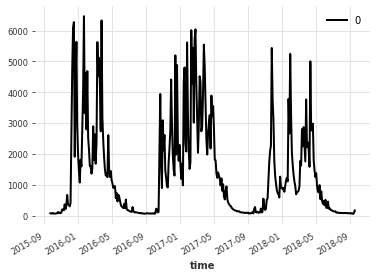

In [18]:

y_preds_mid[0].plot()


In [ ]:
import pandas as pd
start = pd.to_datetime("2015-10-22T21:00:00.000000000")
end = pd.to_datetime("2015-11-02T21:00:00.000000000")
slice = hst_fcasts2[0].slice(start,end)
slice.plot()

In [ ]:
slice

In [ ]:
hst_fcasts = block_rnn_forecaster.historical_forecasts(num_samples=100, forecast_horizon=24, stride=12)

In [ ]:
import pandas as pd
start = pd.to_datetime("2015-09-22T21:00:00.000000000")
end = pd.to_datetime("2015-11-28T21:00:00.000000000")
slice = hst_fcasts[0].slice(start,end)
slice.plot()

In [ ]:
df = block_rnn_forecaster.dataset.y_validation.pd_dataframe()
target_scaler = block_rnn_forecaster.dataset.target_scaler
y_val = target_scaler.inverse_transform(block_rnn_forecaster.dataset.y_validation)
y_val = y_val.pd_dataframe()

In [ ]:
y_pred =  hst_fcasts[0].quantile_df()

In [ ]:
y_pred

In [ ]:
frames= [hst_fcasts[0], y_val]
import pandas as pd
df_joined = pd.concat(frames, axis=1, join="inner")

In [ ]:
df_joined[-550:-500].plot()